In [1]:
#installs
!pip install git+https://github.com/JustAnotherArchivist/snscrape.git
! pip install -U textblob
! python -m textblob.download_corpora
!pip install pandas
!pip install wordcloud
!pip install plotly==5.3.1

  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /private/var/folders/mt/qw7xv63x7jvggcw3qnj7j2l40000gn/T/pip-req-build-pm_q_qk2
  Running command git clone -q https://github.com/JustAnotherArchivist/snscrape.git /private/var/folders/mt/qw7xv63x7jvggcw3qnj7j2l40000gn/T/pip-req-build-pm_q_qk2
[nltk_data] Downloading package brown to
[nltk_data]     /Users/bindupriya/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bindupriya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bindupriya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/bindupriya/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/b

In [2]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import seaborn as sns
import os

#Data Preprocessing and Feature Engineering
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger
import string

import re
import nltk
from bs4 import BeautifulSoup
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import plotly.express as pex

import urllib
import requests

#Model Selection and Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
pd.set_option("display.max_colwidth", -1)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bindupriya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-2-925d8c1fc7f6>:40: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


In [3]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
tweet_count = 50000
text_query = "COVID-19 Vaccine"
since_date = "2020-03-01"
until_date = "2020-03-31"

os.system('snscrape --jsonl --max-results {} --since {} twitter-search "{} until:{}"> text-query-tweets.json1'.format(tweet_count, since_date, text_query, until_date))

0

In [5]:
march2020= pd.read_json('text-query-tweets.json1', lines=True)
march2020.head()

_type  \
0  snscrape.modules.twitter.Tweet   
1  snscrape.modules.twitter.Tweet   
2  snscrape.modules.twitter.Tweet   
3  snscrape.modules.twitter.Tweet   
4  snscrape.modules.twitter.Tweet   

                                                        url  \
0  https://twitter.com/purplgrl5/status/1244776302982451202   
1  https://twitter.com/scarfizal/status/1244776179921498120   
2  https://twitter.com/PDBiz33/status/1244776096135925760     
3  https://twitter.com/PDBiz33/status/1244775882780110848     
4  https://twitter.com/Kiaarrrra/status/1244775642979164160   

                       date  \
0 2020-03-30 23:59:32+00:00   
1 2020-03-30 23:59:02+00:00   
2 2020-03-30 23:58:42+00:00   
3 2020-03-30 23:57:51+00:00   
4 2020-03-30 23:56:54+00:00   

                                                                                                                                                                                                                                                                                               content  \
0  @g Also,  there is flu vaccine every year that only 46% of Americans get and that contributes to the death toll.  You can be sure the people who die from complications of the flu ( mostly from a viral pneumonia like Covid-19) are usually unvaccinated.  So it is highly likely those             
1  Coronavirus treatments: Chloroquine, vaccines and the drugs fighting COVID-19 - CNET https://t.co/mBTEjT9uU3                                                                                                                                                                                          
2  COVID-19 Vaccine has been under our kitchen sinks and noses all along.\nMembers of the WHO, Townsend and Daltrey confirm Tide PODS are the reason Millennials and Generation Zs are 30 times less likely to die from the virus. https://t.co/k2UaovagPe                                               
3  @barstoolsports @joerogan\n@bertkreischer \nCOVID-19 Vaccine has been under our kitchen sinks and noses all along.\nMembers of the WHO, Townsend and Daltrey confirm Tide PODS are the reason Millennials and Generation Zs are 30 times less likely to die from the virus. https://t.co/nSr8OxJ2X5   
4  New goal , get Covid-19 during the summer so I can kill it with heat and survive . Boom makeshift vaccine .                                                                                                                                                                                           

                                                                                                                                                                                                                                                                                       renderedContent  \
0  @g Also,  there is flu vaccine every year that only 46% of Americans get and that contributes to the death toll.  You can be sure the people who die from complications of the flu ( mostly from a viral pneumonia like Covid-19) are usually unvaccinated.  So it is highly likely those             
1  Coronavirus treatments: Chloroquine, vaccines and the drugs fighting COVID-19 - CNET cnet.com/how-to/coronav…                                                                                                                                                                                         
2  COVID-19 Vaccine has been under our kitchen sinks and noses all along.\nMembers of the WHO, Townsend and Daltrey confirm Tide PODS are the reason Millennials and Generation Zs are 30 times less likely to die from the virus. https://t.co/k2UaovagPe                                               
3  @barstoolsports @joerogan\n@bertkreischer \nCOVID-19 Vaccine has been under our kitchen sinks and noses all along.\nMembers of the WHO, Townsend and Daltrey confirm Tide PODS are the reason Millennials and Generation Zs are 30 times less likely to die fro

In [6]:
tweet_count = 50000
text_query = "COVID-19 Vaccine"
since_date = "2020-04-01"
until_date = "2020-04-30"

os.system('snscrape --jsonl --max-results {} --since {} twitter-search "{} until:{}"> text-query-tweets2.json'.format(tweet_count, since_date, text_query, until_date))

0

In [7]:
april2020= pd.read_json('text-query-tweets2.json', lines=True)
april2020.head()

_type  \
0  snscrape.modules.twitter.Tweet   
1  snscrape.modules.twitter.Tweet   
2  snscrape.modules.twitter.Tweet   
3  snscrape.modules.twitter.Tweet   
4  snscrape.modules.twitter.Tweet   

                                                              url  \
0  https://twitter.com/manniteo44/status/1255648045146025992        
1  https://twitter.com/stevetwilightim/status/1255648023113277440   
2  https://twitter.com/Kingsto03059415/status/1255647987751104515   
3  https://twitter.com/stevetwilightim/status/1255647968105058306   
4  https://twitter.com/riversshx/status/1255647967199072256         

                       date  \
0 2020-04-29 23:59:57+00:00   
1 2020-04-29 23:59:52+00:00   
2 2020-04-29 23:59:43+00:00   
3 2020-04-29 23:59:39+00:00   
4 2020-04-29 23:59:38+00:00   

                                                                                                                                                                                                                                                                                                                                   content  \
0  @brndn_mcleod @the_resistor @realDonaldTrump The whole19-20 flu deaths at its height was 53000. That season is over&amp; remember there is a vaccine for the combined N1H1 flu so becoming infected was among those play roulette. Today the US Covid-19 deaths since the 1st case 1/21/20 is more than 61,000-no vaccine. Still rising   
1  TESTING &amp; MITIGATION ARE KEY!\n\nBUY TIME FOR OUR DOCTORS, SCIENTISTS, NURSES &amp; HEALTHY PROFESSIONALS TO COME UP WITH A TREATMENT OR VACCINE TO STOP THIS HIDEOUS COVID 19--PLEASE STAY AT HOME FOR NEXT 3 TO 4 WEEKS https://t.co/7qSpqwqYQW                                                                                     
2  Covid-19: CR seeks FG’s support to build vaccine production plant https://t.co/gdveV1Tobh                                                                                                                                                                                                                                                 
3  TESTING &amp; MITIGATION ARE KEY!\n\nBUY TIME FOR OUR DOCTORS, SCIENTISTS, NURSES &amp; HEALTHY PROFESSIONALS TO COME UP WITH A TREATMENT OR VACCINE TO STOP THIS HIDEOUS COVID 19--PLEASE STAY AT HOME FOR NEXT 3 TO 4 WEEKS https://t.co/qhqtw2tZ6y                                                                                     
4  WTH!? Microchip the people!!\nFrom Bill Gates' plot to microchip the world, to Dr. Fauci blocking natural cures: How anti-vaxxers are already peddling bizarre theories about COVID-19 vaccine BEFORE it even exists \nvia https://t.co/pzxAVWOVWn https://t.co/qWyVFEy1T4                                                                

                                                                                                                                                                                                                                                                                                                           renderedContent  \
0  @brndn_mcleod @the_resistor @realDonaldTrump The whole19-20 flu deaths at its height was 53000. That season is over&amp; remember there is a vaccine for the combined N1H1 flu so becoming infected was among those play roulette. Today the US Covid-19 deaths since the 1st case 1/21/20 is more than 61,000-no vaccine. Still rising   
1  TESTING &amp; MITIGATION ARE KEY!\n\nBUY TIME FOR OUR DOCTORS, SCIENTISTS, NURSES &amp; HEALTHY PROFESSIONALS TO COME UP WITH A TREATMENT OR VACCINE TO STOP THIS HIDEOUS COVID 19--PLEASE STAY AT HOME FOR NEXT 3 TO 4 WEEKS twitter.com/thehill/status…                                                                                 
2  Covid-19: CR seeks FG’s support to build vaccine production plant orientdailynews.com/?p=78749                                                                                                   

In [8]:
tweet_count = 50000
text_query = "COVID-19 Vaccine"
since_date = "2020-05-01"
until_date = "2020-05-31"
os.system('snscrape --jsonl --max-results {} --since {} twitter-search "{} until:{}"> text-query-tweets3.json'.format(tweet_count, since_date, text_query, until_date))

0

In [9]:
may2020= pd.read_json('text-query-tweets3.json', lines=True)
may2020.head()

_type  \
0  snscrape.modules.twitter.Tweet   
1  snscrape.modules.twitter.Tweet   
2  snscrape.modules.twitter.Tweet   
3  snscrape.modules.twitter.Tweet   
4  snscrape.modules.twitter.Tweet   

                                                           url  \
0  https://twitter.com/TenMonthBaby/status/1266881381688389632   
1  https://twitter.com/sparknpluged/status/1266881033284321282   
2  https://twitter.com/JJOutlaw/status/1266880265626038272       
3  https://twitter.com/Monica_wadup/status/1266880092682121217   
4  https://twitter.com/pcgame/status/1266879828977954817         

                       date  \
0 2020-05-30 23:57:13+00:00   
1 2020-05-30 23:55:50+00:00   
2 2020-05-30 23:52:47+00:00   
3 2020-05-30 23:52:06+00:00   
4 2020-05-30 23:51:03+00:00   

                                                                                                                                                                                                                                                                                                 content  \
0  @MollyJongFast Pretty soon the Covid-19 will kill more people than all the billions Trump spent on weapons of mass destruction. Maybe one year's worth of Defense Dollars won't bring a vaccine, but it would be money well spent on DEFENSE if it makes all our lives easier to live in these times.   
1  Cricket and Life Will Be Normal Once Covid-19 Vaccine Comes: Sourav Ganguly https://t.co/Mtv8eBr8UP                                                                                                                                                                                                     
2  @KarmaKaiFilms Yes. My husband and I were just talking about this. We were allowing ourselves to dream about where we wanted to go once this Covid-19 crap is over and there is a vaccine. Then, we had to google how safe those places are for Black people...sigh                                     
3  There is still no cure or vaccine for COVID-19 yet I’m expected to go back to work risk my health and my families health all so people can sit and eat boneless wings and $1 margaritas and complain? I HATE IT HERE.                                                                                   
4  American scientists report Successful Trial of Covid-19 Vaccine on Mice\nRead More: https://t.co/PALuKIG2Fn\n#CoronaVaccine #coronavirus #coronaviruschina #CoronavirusCure #coronaviruslatestnews #coronaviruslockdown #coronavirusnews #coronavirusoutbreak https://t.co/DLlIdv7Dzz                   

                                                                                                                                                                                                                                                                                         renderedContent  \
0  @MollyJongFast Pretty soon the Covid-19 will kill more people than all the billions Trump spent on weapons of mass destruction. Maybe one year's worth of Defense Dollars won't bring a vaccine, but it would be money well spent on DEFENSE if it makes all our lives easier to live in these times.   
1  Cricket and Life Will Be Normal Once Covid-19 Vaccine Comes: Sourav Ganguly macgamenews.com/?p=4720                                                                                                                                                                                                     
2  @KarmaKaiFilms Yes. My husband and I were just talking about this. We were allowing ourselves to dream about where we wanted to go once this Covid-19 crap is over and there is a vaccine. Then, we had to google how safe those places are for Black people...sigh                                     
3  There is still no cure or vaccine for COVID-19 yet I’m expected to go back to work risk my health and my families health all so people can sit and eat boneless wings and $1 margaritas and complain? I HATE IT HERE.    

In [10]:
tweet_count = 50000
text_query = "COVID-19 Vaccine"
since_date = "2021-03-01"
until_date = "2021-03-30"
os.system('snscrape --jsonl --max-results {} --since {} twitter-search "{} until:{}"> text-query-tweets.json'.format(tweet_count, since_date, text_query, until_date))

0

In [11]:
march2021= pd.read_json('text-query-tweets.json', lines=True)
march2021.head()

_type  \
0  snscrape.modules.twitter.Tweet   
1  snscrape.modules.twitter.Tweet   
2  snscrape.modules.twitter.Tweet   
3  snscrape.modules.twitter.Tweet   
4  snscrape.modules.twitter.Tweet   

                                                             url  \
0  https://twitter.com/onenewsph/status/1376685539093442564        
1  https://twitter.com/ArizonaHotspur/status/1376685522735620099   
2  https://twitter.com/rdelpriore713/status/1376685509863424003    
3  https://twitter.com/STForeignDesk/status/1376685497490149378    
4  https://twitter.com/GrindleyLinda/status/1376685478171279360    

                       date  \
0 2021-03-29 23:59:44+00:00   
1 2021-03-29 23:59:40+00:00   
2 2021-03-29 23:59:37+00:00   
3 2021-03-29 23:59:34+00:00   
4 2021-03-29 23:59:30+00:00   

                                                                                                                                                                                                                                                                                                      content  \
0  LOOK | This is the fake Pfizer-BioNTech COVID-19 vaccine recently flagged by the World Health Organization, which was detected in Mexico back in February 2021.\n\nPfizer's doses are required to be stored in ultra-low temperatures of -80 to -60ºC. (via News5/@GVGregorio_TV5) https://t.co/l1TsfXa4YX   
1  @POTUS And 30 to 40% of Americans will choose not to be vaccinated.\nThe Covid 19 vaccine also protects against our second pandemic, stupidity.                                                                                                                                                              
2  However, it is appalling and unconscionable that this took a court ruling, as thousands of incarcerated New Yorkers have tested positive for #COVID-19 and dozens have died. Vaccines will save lives and  @NYGovCuomo must follow this court ruling at once.                                                
3  Canada pauses AstraZeneca Covid-19 vaccine use for those under 55, wants new risk analysis https://t.co/CQo1Flne3B                                                                                                                                                                                           
4  How many Covid-19 vaccine deaths are acceptable? https://t.co/uLpbW1KewM                                                                                                                                                                                                                                     

                                                                                                                                                                                                                                                                                              renderedContent  \
0  LOOK | This is the fake Pfizer-BioNTech COVID-19 vaccine recently flagged by the World Health Organization, which was detected in Mexico back in February 2021.\n\nPfizer's doses are required to be stored in ultra-low temperatures of -80 to -60ºC. (via News5/@GVGregorio_TV5) https://t.co/l1TsfXa4YX   
1  @POTUS And 30 to 40% of Americans will choose not to be vaccinated.\nThe Covid 19 vaccine also protects against our second pandemic, stupidity.                                                                                                                                                              
2  However, it is appalling and unconscionable that this took a court ruling, as thousands of incarcerated New Yorkers have tested positive for #COVID-19 and dozens have died. Vaccines will save lives and  @NYGovCuomo must follow this court ruling at once.                                                
3  Canada pauses AstraZeneca Covid-19 vaccine use for those under 55, wants new risk analysis dlvr.it/Rwd7Kc                                                  

In [12]:
tweet_count = 50000
text_query = "COVID-19 Vaccine"
since_date = "2021-04-01"
until_date = "2021-04-30"
os.system('snscrape --jsonl --max-results {} --since {} twitter-search "{} until:{}"> text-query-tweets5.json'.format(tweet_count, since_date, text_query, until_date))

0

In [13]:
april2021= pd.read_json('text-query-tweets5.json', lines=True)
april2021.head()

_type  \
0  snscrape.modules.twitter.Tweet   
1  snscrape.modules.twitter.Tweet   
2  snscrape.modules.twitter.Tweet   
3  snscrape.modules.twitter.Tweet   
4  snscrape.modules.twitter.Tweet   

                                                              url  \
0  https://twitter.com/ClarkCoWA_PH/status/1387919563128516612      
1  https://twitter.com/EnnDai/status/1387919528806346760            
2  https://twitter.com/TheStarPhoenix/status/1387919522192056322    
3  https://twitter.com/SkylerSwisher/status/1387919490080546816     
4  https://twitter.com/radyopilipinas1/status/1387919486175481859   

                       date  \
0 2021-04-29 23:59:44+00:00   
1 2021-04-29 23:59:36+00:00   
2 2021-04-29 23:59:35+00:00   
3 2021-04-29 23:59:27+00:00   
4 2021-04-29 23:59:26+00:00   

                                                                                                                                                                                                                                                                                                      content  \
0  “I can’t take care of my family and my community unless I first take care of myself.” The vaccine protects Steve from getting really sick from COVID-19 and gets the community one shot closer to herd immunity and reopening without restrictions. \n#IGotTheShot\n#ThisIsOurShot https://t.co/8a8wUo8Ibb   
1  @deborahj77 Bombshell:  Australian Government Website Authorizes COVID-19 Vaccine – Refers To It As “Poison” - https://t.co/Nsw9tjyA94                                                                                                                                                                       
2  Moderna boosting COVID-19 vaccine-making capacity, targets up to 3 billion shots in 2022 https://t.co/e1azEQ2enw                                                                                                                                                                                             
3  Florida moved quickly to protect people who don't get the COVID-19 shot from discrimination. But what about businesses that discriminate against those who get the vaccine? Those protections failed to pass the Florida Senate today. https://t.co/5LHpd8npCf                                               
4  PANOORIN | Paglilipat ng nasa 56,400 doses ng Sinovac COVID-19 vaccines. Nasa 36 boxes ang ibinaba at inilipat sa nag-aantay na refrigerated vans. | via Angelie Tajapal | RP1 Cebu\n\n#RESBAKUNA\n#BIDABakunation\n#BIDASolution+ https://t.co/bi0MsBAZKL                                                   

                                                                                                                                                                                                                                                                                              renderedContent  \
0  “I can’t take care of my family and my community unless I first take care of myself.” The vaccine protects Steve from getting really sick from COVID-19 and gets the community one shot closer to herd immunity and reopening without restrictions. \n#IGotTheShot\n#ThisIsOurShot https://t.co/8a8wUo8Ibb   
1  @deborahj77 Bombshell:  Australian Government Website Authorizes COVID-19 Vaccine – Refers To It As “Poison” - sonsoflibertymedia.com/?p=124356                                                                                                                                                              
2  Moderna boosting COVID-19 vaccine-making capacity, targets up to 3 billion shots in 2022 thestarphoenix.com/news/world/mod…                                                                                                                                                                                  
3  Florida moved quickly to protect people who don't get the COVID-19 shot from discrimination. But what about businesses that discriminate against thos

In [14]:
tweet_count = 50000
text_query = "COVID-19 Vaccine"
since_date = "2021-05-01"
until_date = "2021-05-31"
os.system('snscrape --jsonl --max-results {} --since {} twitter-search "{} until:{}"> text-query-tweets6.json'.format(tweet_count, since_date, text_query, until_date))

0

In [15]:
may2021= pd.read_json('text-query-tweets6.json', lines=True)
may2021.head()

_type  \
0  snscrape.modules.twitter.Tweet   
1  snscrape.modules.twitter.Tweet   
2  snscrape.modules.twitter.Tweet   
3  snscrape.modules.twitter.Tweet   
4  snscrape.modules.twitter.Tweet   

                                                              url  \
0  https://twitter.com/DuskaSulicich/status/1399153589512138754     
1  https://twitter.com/validosius/status/1399153435044237312        
2  https://twitter.com/Miss_Naste/status/1399153402643288064        
3  https://twitter.com/ServiceNSW/status/1399153287924883457        
4  https://twitter.com/TodayHeadline42/status/1399153280161288195   

                       date  \
0 2021-05-30 23:59:45+00:00   
1 2021-05-30 23:59:08+00:00   
2 2021-05-30 23:59:00+00:00   
3 2021-05-30 23:58:33+00:00   
4 2021-05-30 23:58:31+00:00   

                                                                                                                                                                                                                                                             content  \
0  "On May 18, the federal Department of Health quietly extended a tender for the 'provision of Covid-19 vaccine administration for residential aged-care providers'."                                                                                                 
1  CBS News: Companies can make employees take COVID-19 vaccine, EEOC says.\nhttps://t.co/CwiD4mLBmx                                                                                                                                                                   
2  @JoeBarri Because not all people have had the opportunity to get the vaccine in my area (high percentage want the vaccine, so lines are still long).  Wearing a mask can prevent them from catching it from me since the vaccine doesn't mean I WONT get Covid 19   
3  @mickrad Hi Mick, there are different levels of eligibility seperate to age. We recommend that you give the National coronavirus and COVID-19 vaccine helpline a call on 1800 020 080 for further clarification.                                                    
4  Vaccines Minister Confirms Government Is Considering Compulsory Covid-19 Jabs For NHS Staff https://t.co/UiAyyRmRw2                                                                                                                                                 

                                                                                                                                                                                                                                                     renderedContent  \
0  "On May 18, the federal Department of Health quietly extended a tender for the 'provision of Covid-19 vaccine administration for residential aged-care providers'."                                                                                                 
1  CBS News: Companies can make employees take COVID-19 vaccine, EEOC says.\ncbsnews.com/news/covid-vac…                                                                                                                                                               
2  @JoeBarri Because not all people have had the opportunity to get the vaccine in my area (high percentage want the vaccine, so lines are still long).  Wearing a mask can prevent them from catching it from me since the vaccine doesn't mean I WONT get Covid 19   
3  @mickrad Hi Mick, there are different levels of eligibility seperate to age. We recommend that you give the National coronavirus and COVID-19 vaccine helpline a call on 1800 020 080 for further clarification.                                                    
4  Vaccines Minister Confirms Government Is Considering Compulsory Covid-19 Jabs For NHS Staff todayheadline.co/vaccines-minis…                                                                                                                                        

                    id  \
0  1399

In [16]:
df_concat_1 = pd.concat([march2020, april2020], ignore_index=True)

In [17]:
df_concat_1.shape

(100000, 28)

In [18]:
df_concat_2=pd.concat([may2020, april2021], ignore_index=True)

In [19]:
df_concat_2.shape

(100000, 28)

In [20]:
df_concat_3=pd.concat([may2021, march2021], ignore_index=True)

In [21]:
df_concat_3.shape

(100000, 28)

In [22]:
df_concat_12=pd.concat([df_concat_1,df_concat_2])

In [23]:
df_concat_12.shape

(200000, 28)

In [24]:
df_concat_all=pd.concat([df_concat_12,df_concat_3])

In [25]:
df_concat_all.shape

(300000, 28)

In [26]:
df_concat_all.dtypes

_type               object             
url                 object             
date                datetime64[ns, UTC]
content             object             
renderedContent     object             
id                  int64              
user                object             
replyCount          int64              
retweetCount        int64              
likeCount           int64              
quoteCount          int64              
conversationId      int64              
lang                object             
source              object             
sourceUrl           object             
sourceLabel         object             
outlinks            object             
tcooutlinks         object             
media               object             
retweetedTweet      float64            
quotedTweet         object             
inReplyToTweetId    float64            
inReplyToUser       object             
mentionedUsers      object             
coordinates         object             


In [27]:
df_concat_all['id'].value_counts()
#60000 unique user id's 

1240988012202192896    1
1240271651327090688    1
1244634696249729024    1
1398249671701716996    1
1387177747345203206    1
                      ..
1386801251279536129    1
1398746317468360710    1
1241577650071769090    1
1376175434522583041    1
1262592342353039361    1
Name: id, Length: 300000, dtype: int64

In [28]:
df_concat_all['content'].head()
#reviewing type of noise that needs to be removed to get only text for future processing

0    @g Also,  there is flu vaccine every year that only 46% of Americans get and that contributes to the death toll.  You can be sure the people who die from complications of the flu ( mostly from a viral pneumonia like Covid-19) are usually unvaccinated.  So it is highly likely those          
1    Coronavirus treatments: Chloroquine, vaccines and the drugs fighting COVID-19 - CNET https://t.co/mBTEjT9uU3                                                                                                                                                                                       
2    COVID-19 Vaccine has been under our kitchen sinks and noses all along.\nMembers of the WHO, Townsend and Daltrey confirm Tide PODS are the reason Millennials and Generation Zs are 30 times less likely to die from the virus. https://t.co/k2UaovagPe                                            
3    @barstoolsports @joerogan\n@bertkreischer \nCOVID-19 Vaccine has been under our kitchen sinks and noses 

In [29]:
df_copy=df_concat_all

In [30]:
df_copy2=df_copy

In [31]:
df_concat_all['content'].str.lower()

0        @g also,  there is flu vaccine every year that only 46% of americans get and that contributes to the death toll.  you can be sure the people who die from complications of the flu ( mostly from a viral pneumonia like covid-19) are usually unvaccinated.  so it is highly likely those          
1        coronavirus treatments: chloroquine, vaccines and the drugs fighting covid-19 - cnet https://t.co/mbtejt9uu3                                                                                                                                                                                       
2        covid-19 vaccine has been under our kitchen sinks and noses all along.\nmembers of the who, townsend and daltrey confirm tide pods are the reason millennials and generation zs are 30 times less likely to die from the virus. https://t.co/k2uaovagpe                                            
3        @barstoolsports @joerogan\n@bertkreischer \ncovid-19 vaccine has been under our kitchen 

In [32]:
# write function for removing @user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [33]:
df_concat_all['newcontent'] = np.vectorize(remove_pattern)(df_concat_all['content'], '@[\w]*')
#storing modified content column in a new column called new content

In [34]:
df_concat_all.head()

_type  \
0  snscrape.modules.twitter.Tweet   
1  snscrape.modules.twitter.Tweet   
2  snscrape.modules.twitter.Tweet   
3  snscrape.modules.twitter.Tweet   
4  snscrape.modules.twitter.Tweet   

                                                        url  \
0  https://twitter.com/purplgrl5/status/1244776302982451202   
1  https://twitter.com/scarfizal/status/1244776179921498120   
2  https://twitter.com/PDBiz33/status/1244776096135925760     
3  https://twitter.com/PDBiz33/status/1244775882780110848     
4  https://twitter.com/Kiaarrrra/status/1244775642979164160   

                       date  \
0 2020-03-30 23:59:32+00:00   
1 2020-03-30 23:59:02+00:00   
2 2020-03-30 23:58:42+00:00   
3 2020-03-30 23:57:51+00:00   
4 2020-03-30 23:56:54+00:00   

                                                                                                                                                                                                                                                                                               content  \
0  @g Also,  there is flu vaccine every year that only 46% of Americans get and that contributes to the death toll.  You can be sure the people who die from complications of the flu ( mostly from a viral pneumonia like Covid-19) are usually unvaccinated.  So it is highly likely those             
1  Coronavirus treatments: Chloroquine, vaccines and the drugs fighting COVID-19 - CNET https://t.co/mBTEjT9uU3                                                                                                                                                                                          
2  COVID-19 Vaccine has been under our kitchen sinks and noses all along.\nMembers of the WHO, Townsend and Daltrey confirm Tide PODS are the reason Millennials and Generation Zs are 30 times less likely to die from the virus. https://t.co/k2UaovagPe                                               
3  @barstoolsports @joerogan\n@bertkreischer \nCOVID-19 Vaccine has been under our kitchen sinks and noses all along.\nMembers of the WHO, Townsend and Daltrey confirm Tide PODS are the reason Millennials and Generation Zs are 30 times less likely to die from the virus. https://t.co/nSr8OxJ2X5   
4  New goal , get Covid-19 during the summer so I can kill it with heat and survive . Boom makeshift vaccine .                                                                                                                                                                                           

                                                                                                                                                                                                                                                                                       renderedContent  \
0  @g Also,  there is flu vaccine every year that only 46% of Americans get and that contributes to the death toll.  You can be sure the people who die from complications of the flu ( mostly from a viral pneumonia like Covid-19) are usually unvaccinated.  So it is highly likely those             
1  Coronavirus treatments: Chloroquine, vaccines and the drugs fighting COVID-19 - CNET cnet.com/how-to/coronav…                                                                                                                                                                                         
2  COVID-19 Vaccine has been under our kitchen sinks and noses all along.\nMembers of the WHO, Townsend and Daltrey confirm Tide PODS are the reason Millennials and Generation Zs are 30 times less likely to die from the virus. https://t.co/k2UaovagPe                                               
3  @barstoolsports @joerogan\n@bertkreischer \nCOVID-19 Vaccine has been under our kitchen sinks and noses all along.\nMembers of the WHO, Townsend and Daltrey confirm Tide PODS are the reason Millennials and Generation Zs are 30 times less likely to die fro

In [35]:
#removing http and urls from the tweets 
import re
df_concat_all['newcontent'] = df_concat_all['newcontent'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [36]:
df_concat_all.head(3)

_type  \
0  snscrape.modules.twitter.Tweet   
1  snscrape.modules.twitter.Tweet   
2  snscrape.modules.twitter.Tweet   

                                                        url  \
0  https://twitter.com/purplgrl5/status/1244776302982451202   
1  https://twitter.com/scarfizal/status/1244776179921498120   
2  https://twitter.com/PDBiz33/status/1244776096135925760     

                       date  \
0 2020-03-30 23:59:32+00:00   
1 2020-03-30 23:59:02+00:00   
2 2020-03-30 23:58:42+00:00   

                                                                                                                                                                                                                                                                                     content  \
0  @g Also,  there is flu vaccine every year that only 46% of Americans get and that contributes to the death toll.  You can be sure the people who die from complications of the flu ( mostly from a viral pneumonia like Covid-19) are usually unvaccinated.  So it is highly likely those   
1  Coronavirus treatments: Chloroquine, vaccines and the drugs fighting COVID-19 - CNET https://t.co/mBTEjT9uU3                                                                                                                                                                                
2  COVID-19 Vaccine has been under our kitchen sinks and noses all along.\nMembers of the WHO, Townsend and Daltrey confirm Tide PODS are the reason Millennials and Generation Zs are 30 times less likely to die from the virus. https://t.co/k2UaovagPe                                     

                                                                                                                                                                                                                                                                             renderedContent  \
0  @g Also,  there is flu vaccine every year that only 46% of Americans get and that contributes to the death toll.  You can be sure the people who die from complications of the flu ( mostly from a viral pneumonia like Covid-19) are usually unvaccinated.  So it is highly likely those   
1  Coronavirus treatments: Chloroquine, vaccines and the drugs fighting COVID-19 - CNET cnet.com/how-to/coronav…                                                                                                                                                                               
2  COVID-19 Vaccine has been under our kitchen sinks and noses all along.\nMembers of the WHO, Townsend and Daltrey confirm Tide PODS are the reason Millennials and Generation Zs are 30 times less likely to die from the virus. https://t.co/k2UaovagPe                                     

                    id  \
0  1244776302982451202   
1  1244776179921498120   
2  1244776096135925760   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             user 

In [37]:
# remove special characters, numbers, punctuations
df_concat_all['newcontent'] = df_concat_all['newcontent'].str.replace('[^a-zA-Z#]+',' ')

<ipython-input-37-9125eb78271a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_concat_all['newcontent'] = df_concat_all['newcontent'].str.replace('[^a-zA-Z#]+',' ')


In [38]:
df_concat_all.head(3)

_type  \
0  snscrape.modules.twitter.Tweet   
1  snscrape.modules.twitter.Tweet   
2  snscrape.modules.twitter.Tweet   

                                                        url  \
0  https://twitter.com/purplgrl5/status/1244776302982451202   
1  https://twitter.com/scarfizal/status/1244776179921498120   
2  https://twitter.com/PDBiz33/status/1244776096135925760     

                       date  \
0 2020-03-30 23:59:32+00:00   
1 2020-03-30 23:59:02+00:00   
2 2020-03-30 23:58:42+00:00   

                                                                                                                                                                                                                                                                                     content  \
0  @g Also,  there is flu vaccine every year that only 46% of Americans get and that contributes to the death toll.  You can be sure the people who die from complications of the flu ( mostly from a viral pneumonia like Covid-19) are usually unvaccinated.  So it is highly likely those   
1  Coronavirus treatments: Chloroquine, vaccines and the drugs fighting COVID-19 - CNET https://t.co/mBTEjT9uU3                                                                                                                                                                                
2  COVID-19 Vaccine has been under our kitchen sinks and noses all along.\nMembers of the WHO, Townsend and Daltrey confirm Tide PODS are the reason Millennials and Generation Zs are 30 times less likely to die from the virus. https://t.co/k2UaovagPe                                     

                                                                                                                                                                                                                                                                             renderedContent  \
0  @g Also,  there is flu vaccine every year that only 46% of Americans get and that contributes to the death toll.  You can be sure the people who die from complications of the flu ( mostly from a viral pneumonia like Covid-19) are usually unvaccinated.  So it is highly likely those   
1  Coronavirus treatments: Chloroquine, vaccines and the drugs fighting COVID-19 - CNET cnet.com/how-to/coronav…                                                                                                                                                                               
2  COVID-19 Vaccine has been under our kitchen sinks and noses all along.\nMembers of the WHO, Townsend and Daltrey confirm Tide PODS are the reason Millennials and Generation Zs are 30 times less likely to die from the virus. https://t.co/k2UaovagPe                                     

                    id  \
0  1244776302982451202   
1  1244776179921498120   
2  1244776096135925760   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             user 

In [39]:
# remove short words
df_concat_all['newcontent'] = df_concat_all['newcontent'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

In [40]:
df_concat_all.head(3)

_type  \
0  snscrape.modules.twitter.Tweet   
1  snscrape.modules.twitter.Tweet   
2  snscrape.modules.twitter.Tweet   

                                                        url  \
0  https://twitter.com/purplgrl5/status/1244776302982451202   
1  https://twitter.com/scarfizal/status/1244776179921498120   
2  https://twitter.com/PDBiz33/status/1244776096135925760     

                       date  \
0 2020-03-30 23:59:32+00:00   
1 2020-03-30 23:59:02+00:00   
2 2020-03-30 23:58:42+00:00   

                                                                                                                                                                                                                                                                                     content  \
0  @g Also,  there is flu vaccine every year that only 46% of Americans get and that contributes to the death toll.  You can be sure the people who die from complications of the flu ( mostly from a viral pneumonia like Covid-19) are usually unvaccinated.  So it is highly likely those   
1  Coronavirus treatments: Chloroquine, vaccines and the drugs fighting COVID-19 - CNET https://t.co/mBTEjT9uU3                                                                                                                                                                                
2  COVID-19 Vaccine has been under our kitchen sinks and noses all along.\nMembers of the WHO, Townsend and Daltrey confirm Tide PODS are the reason Millennials and Generation Zs are 30 times less likely to die from the virus. https://t.co/k2UaovagPe                                     

                                                                                                                                                                                                                                                                             renderedContent  \
0  @g Also,  there is flu vaccine every year that only 46% of Americans get and that contributes to the death toll.  You can be sure the people who die from complications of the flu ( mostly from a viral pneumonia like Covid-19) are usually unvaccinated.  So it is highly likely those   
1  Coronavirus treatments: Chloroquine, vaccines and the drugs fighting COVID-19 - CNET cnet.com/how-to/coronav…                                                                                                                                                                               
2  COVID-19 Vaccine has been under our kitchen sinks and noses all along.\nMembers of the WHO, Townsend and Daltrey confirm Tide PODS are the reason Millennials and Generation Zs are 30 times less likely to die from the virus. https://t.co/k2UaovagPe                                     

                    id  \
0  1244776302982451202   
1  1244776179921498120   
2  1244776096135925760   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             user 

In [41]:
# create new variable tokenized tweet 
tokenized_tweet = df_concat_all['newcontent'].apply(lambda x: x.split())

In [42]:
tokenized_tweet.head(3)

0    [Also, there, flu, vaccine, every, year, that, only, Americans, get, and, that, contributes, the, death, toll, You, can, sure, the, people, who, die, from, complications, the, flu, mostly, from, viral, pneumonia, like, Covid, are, usually, unvaccinated, highly, likely, those]
1    [Coronavirus, treatments, Chloroquine, vaccines, and, the, drugs, fighting, COVID, CNET]                                                                                                                                                                                            
2    [COVID, Vaccine, has, been, under, our, kitchen, sinks, and, noses, all, along, Members, the, WHO, Townsend, and, Daltrey, confirm, Tide, PODS, are, the, reason, Millennials, and, Generation, are, times, less, likely, die, from, the, virus]                                    
Name: newcontent, dtype: object

What are the most common words in the entire dataset?

What are the most common words in the dataset for negative and positive tweets, respectively?

How many hashtags are there in a tweet?

Which trends are associated with my dataset?

Which trends are associated with either of the sentiments? Are they compatible with the sentiments?

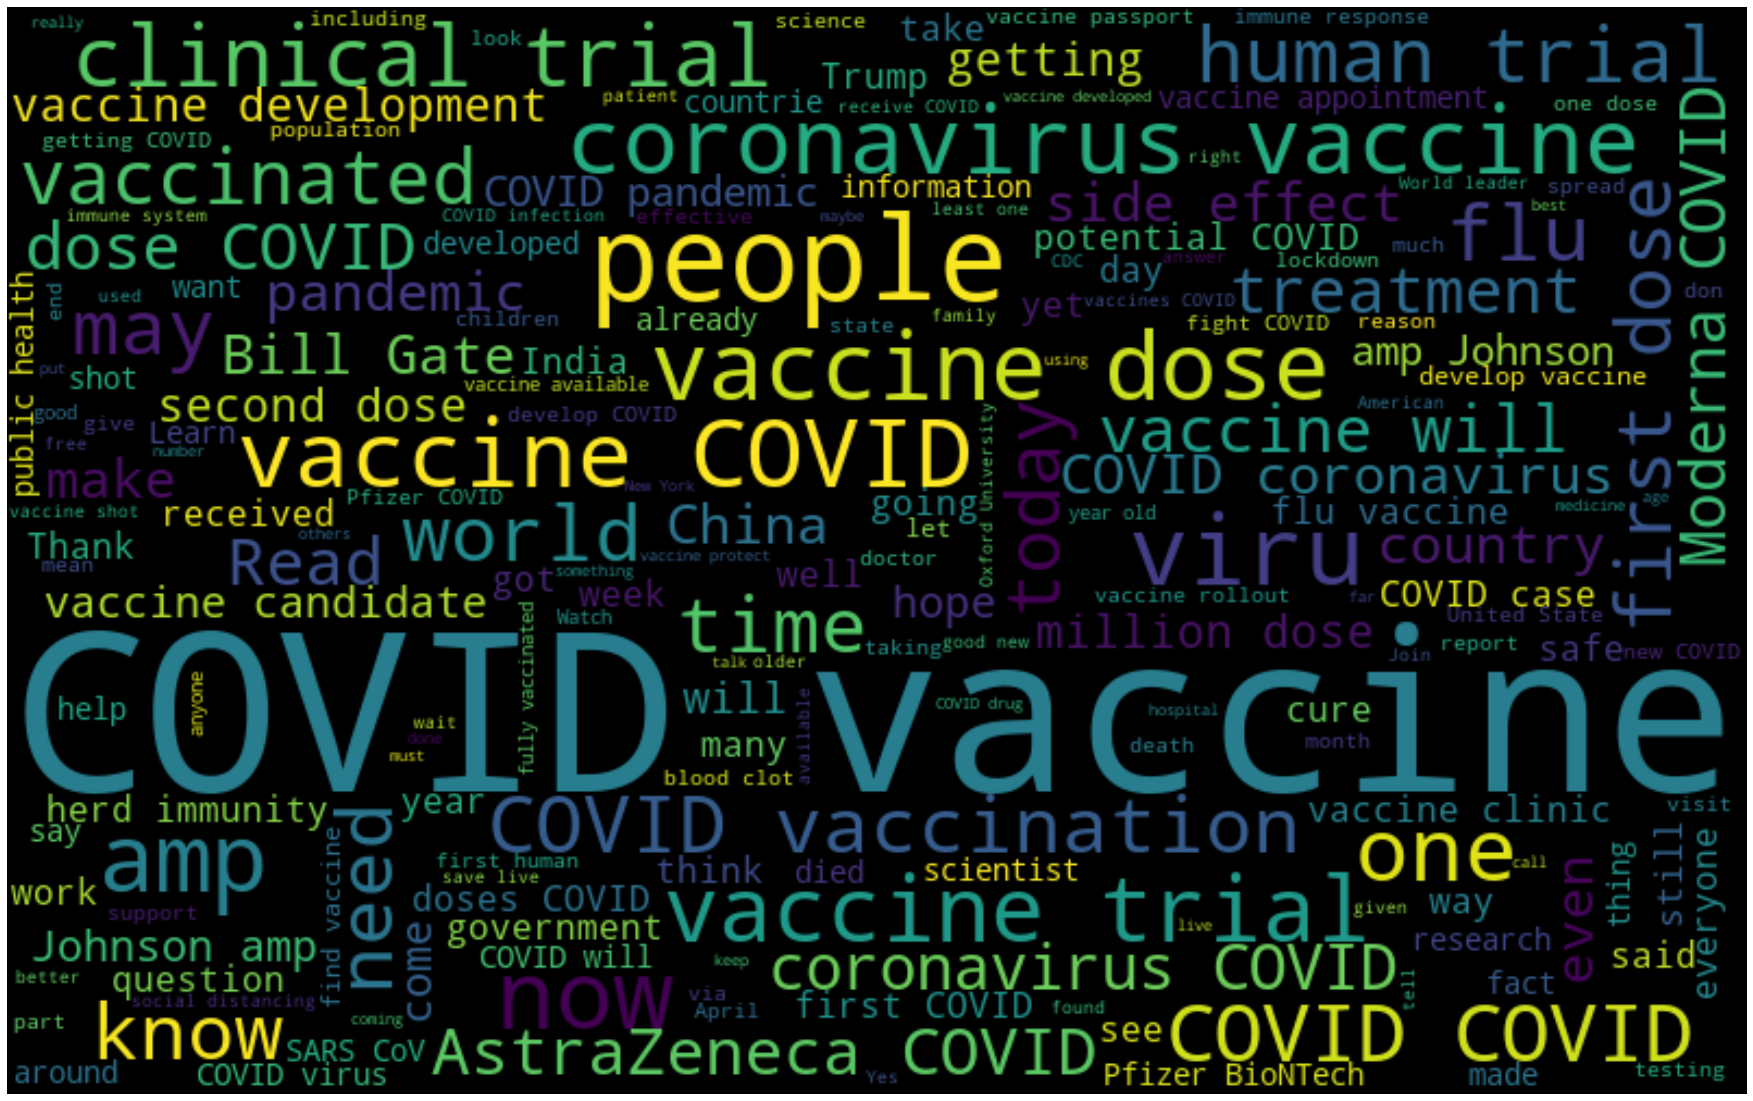

In [43]:
# create text from all tweets
all_words = ' '.join([text for text in df_concat_all['newcontent']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(40, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [54]:
import nltk
nltk.download('vader_lexicon') # Download the VADER lexicon
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Obtaining NLTK scores
df_concat_all['nltk_scores'] = df_concat_all['newcontent'].apply(lambda x: sia.polarity_scores(x))

# Obtaining NLTK compound score
df_concat_all['nltk_cmp_score'] = df_concat_all['nltk_scores'].apply(lambda score_dict: score_dict['compound'])

# Set threshold to define neutral sentiment
neutral_thresh = 0.05

# Categorize scores into the sentiments of positive, neutral or negative
df_concat_all['nltk_sentiment'] = df_concat_all['nltk_cmp_score'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/bindupriya/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [46]:
df_concat_all.head(3)

_type  \
0  snscrape.modules.twitter.Tweet   
1  snscrape.modules.twitter.Tweet   
2  snscrape.modules.twitter.Tweet   

                                                        url  \
0  https://twitter.com/purplgrl5/status/1244776302982451202   
1  https://twitter.com/scarfizal/status/1244776179921498120   
2  https://twitter.com/PDBiz33/status/1244776096135925760     

                       date  \
0 2020-03-30 23:59:32+00:00   
1 2020-03-30 23:59:02+00:00   
2 2020-03-30 23:58:42+00:00   

                                                                                                                                                                                                                                                                                     content  \
0  @g Also,  there is flu vaccine every year that only 46% of Americans get and that contributes to the death toll.  You can be sure the people who die from complications of the flu ( mostly from a viral pneumonia like Covid-19) are usually unvaccinated.  So it is highly likely those   
1  Coronavirus treatments: Chloroquine, vaccines and the drugs fighting COVID-19 - CNET https://t.co/mBTEjT9uU3                                                                                                                                                                                
2  COVID-19 Vaccine has been under our kitchen sinks and noses all along.\nMembers of the WHO, Townsend and Daltrey confirm Tide PODS are the reason Millennials and Generation Zs are 30 times less likely to die from the virus. https://t.co/k2UaovagPe                                     

                                                                                                                                                                                                                                                                             renderedContent  \
0  @g Also,  there is flu vaccine every year that only 46% of Americans get and that contributes to the death toll.  You can be sure the people who die from complications of the flu ( mostly from a viral pneumonia like Covid-19) are usually unvaccinated.  So it is highly likely those   
1  Coronavirus treatments: Chloroquine, vaccines and the drugs fighting COVID-19 - CNET cnet.com/how-to/coronav…                                                                                                                                                                               
2  COVID-19 Vaccine has been under our kitchen sinks and noses all along.\nMembers of the WHO, Townsend and Daltrey confirm Tide PODS are the reason Millennials and Generation Zs are 30 times less likely to die from the virus. https://t.co/k2UaovagPe                                     

                    id  \
0  1244776302982451202   
1  1244776179921498120   
2  1244776096135925760   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             user 

In [47]:
df_concat_all['nltk_sentiment'].value_counts()

Positive    125108
Neutral     105292
Negative    69600 
Name: nltk_sentiment, dtype: int64

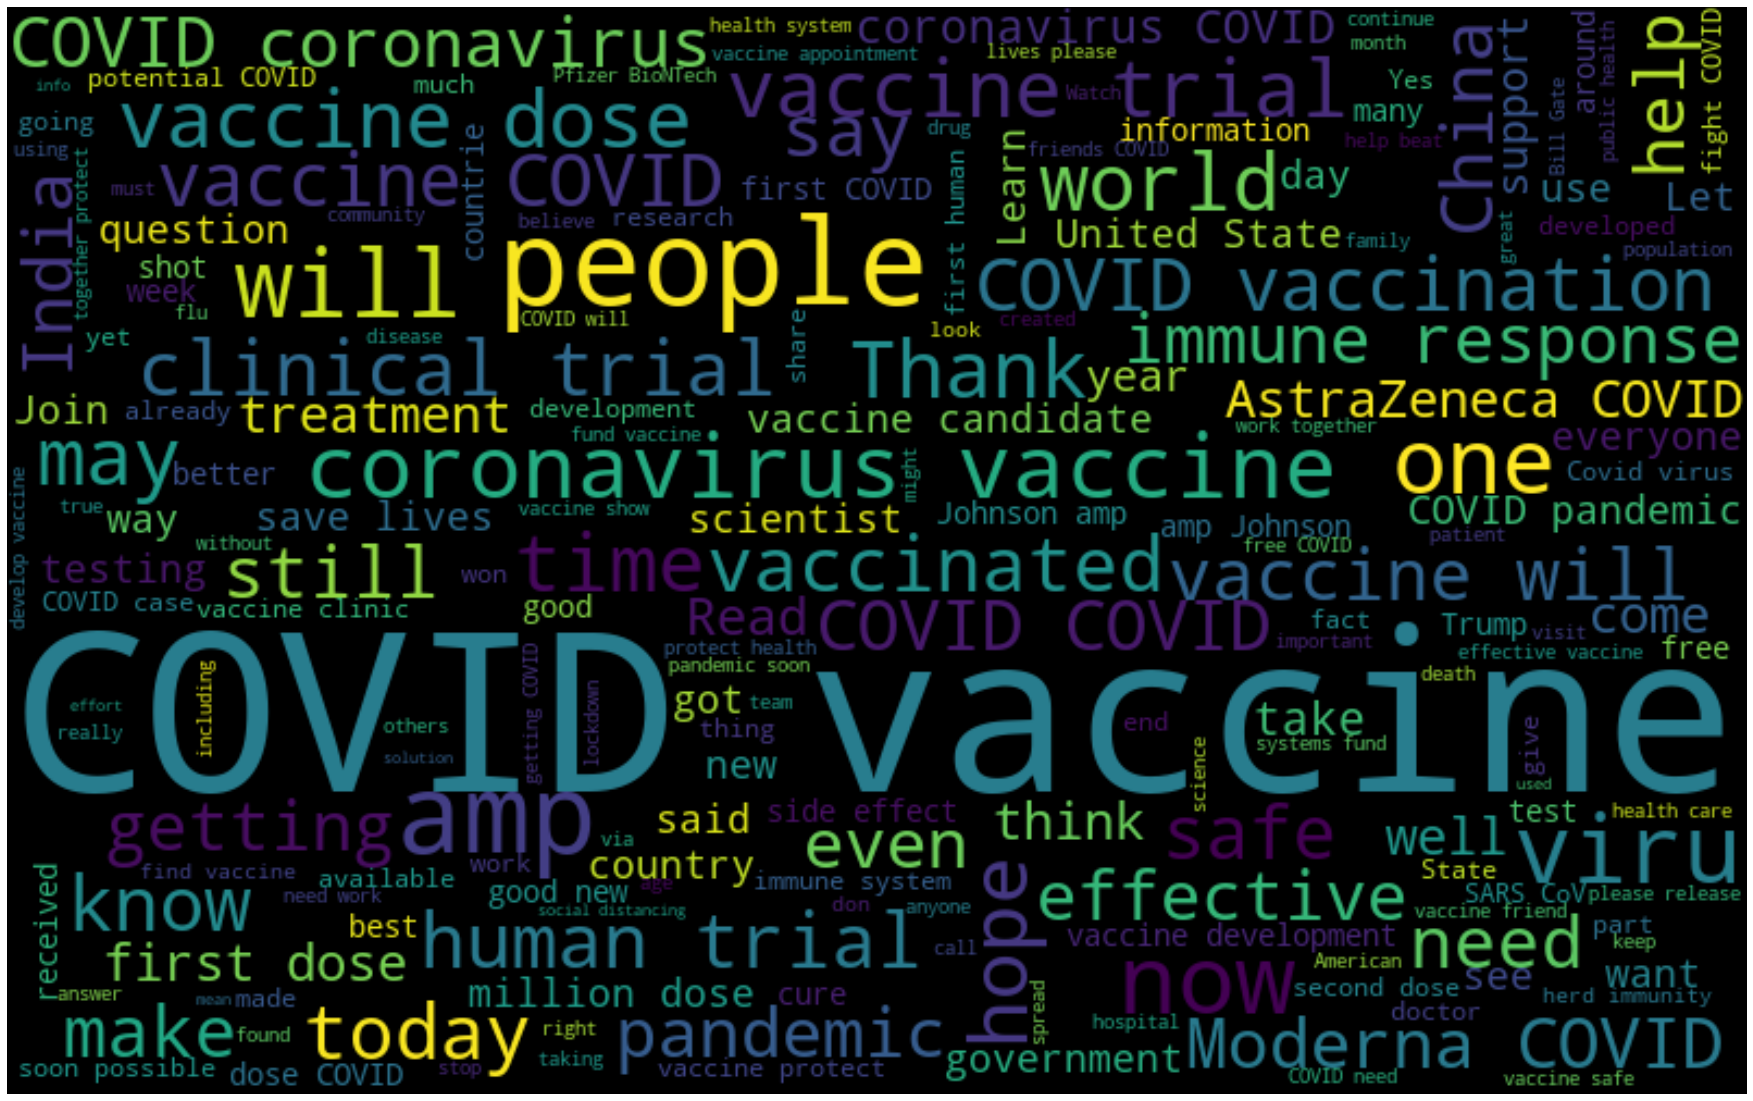

In [48]:
# create text from just normal tweets
normal_words = ' '.join([text for text in df_concat_all['newcontent'][df_concat_all['nltk_sentiment'] == 'Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(40, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

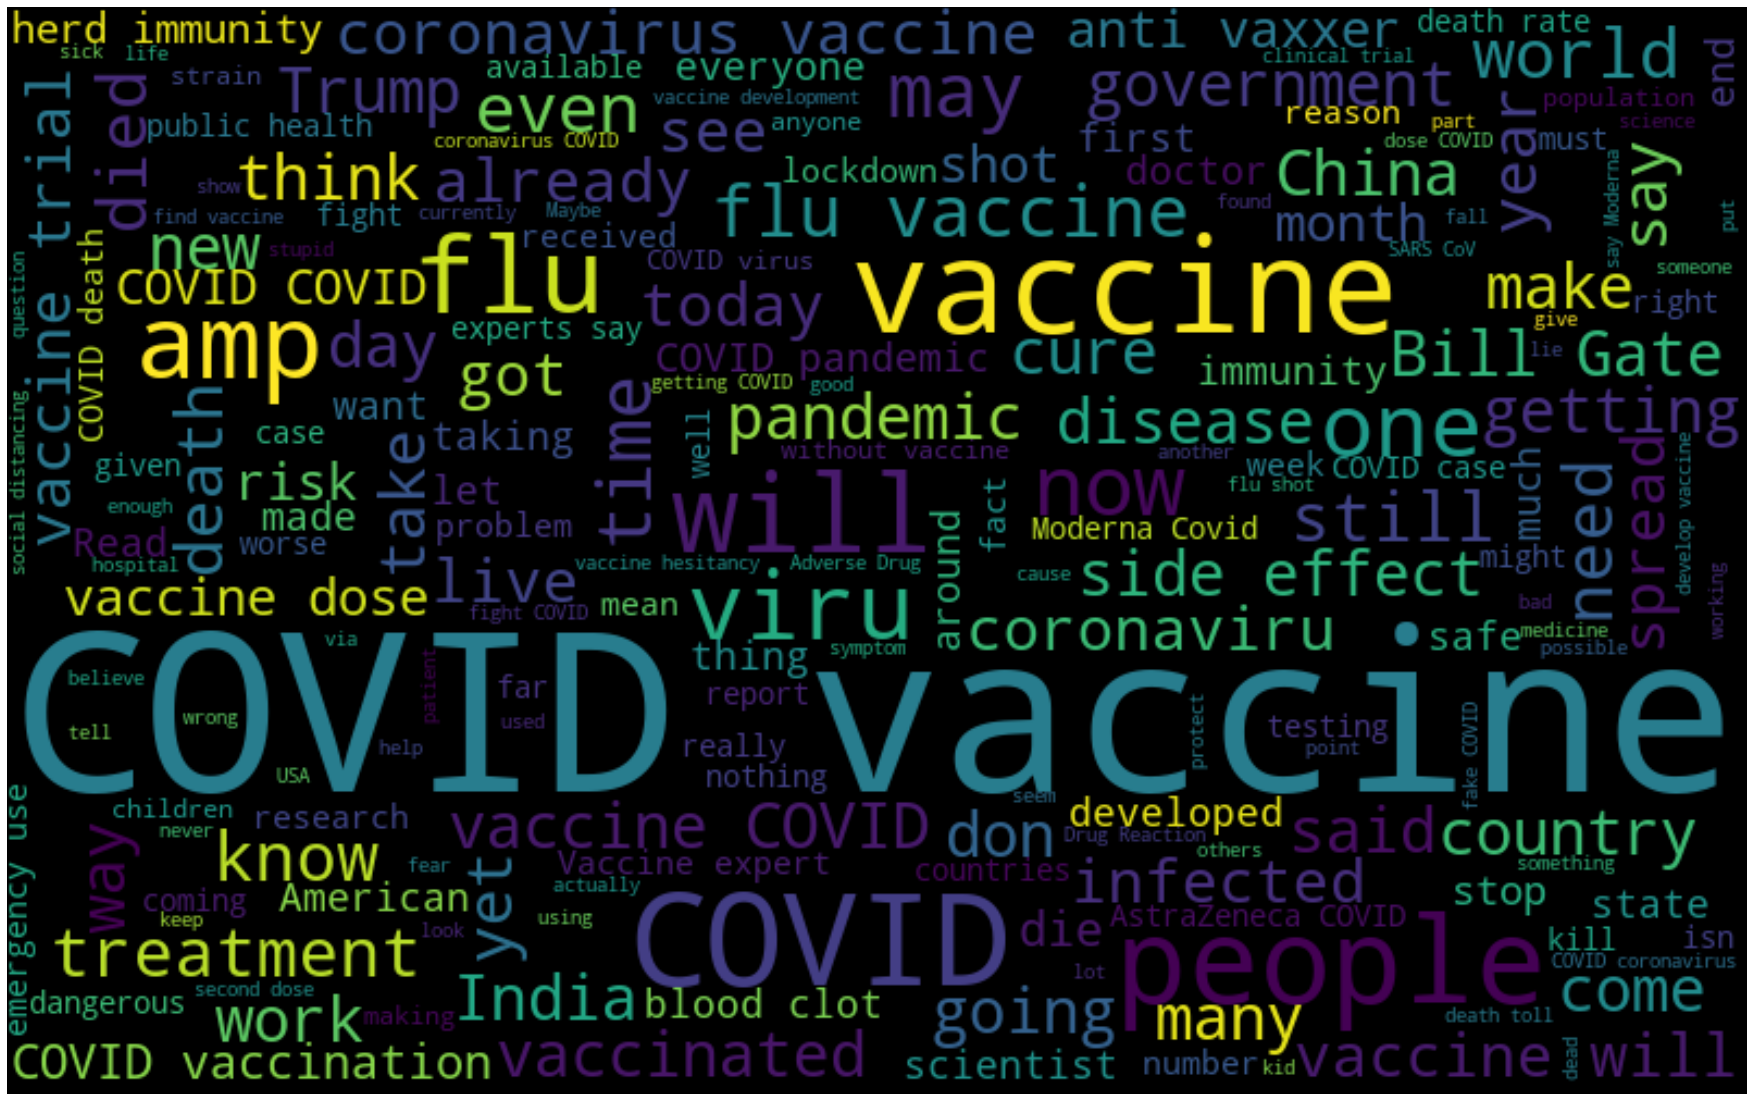

In [49]:
# create text from just normal tweets
normal_words = ' '.join([text for text in df_concat_all['newcontent'][df_concat_all['nltk_sentiment'] == 'Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(40, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

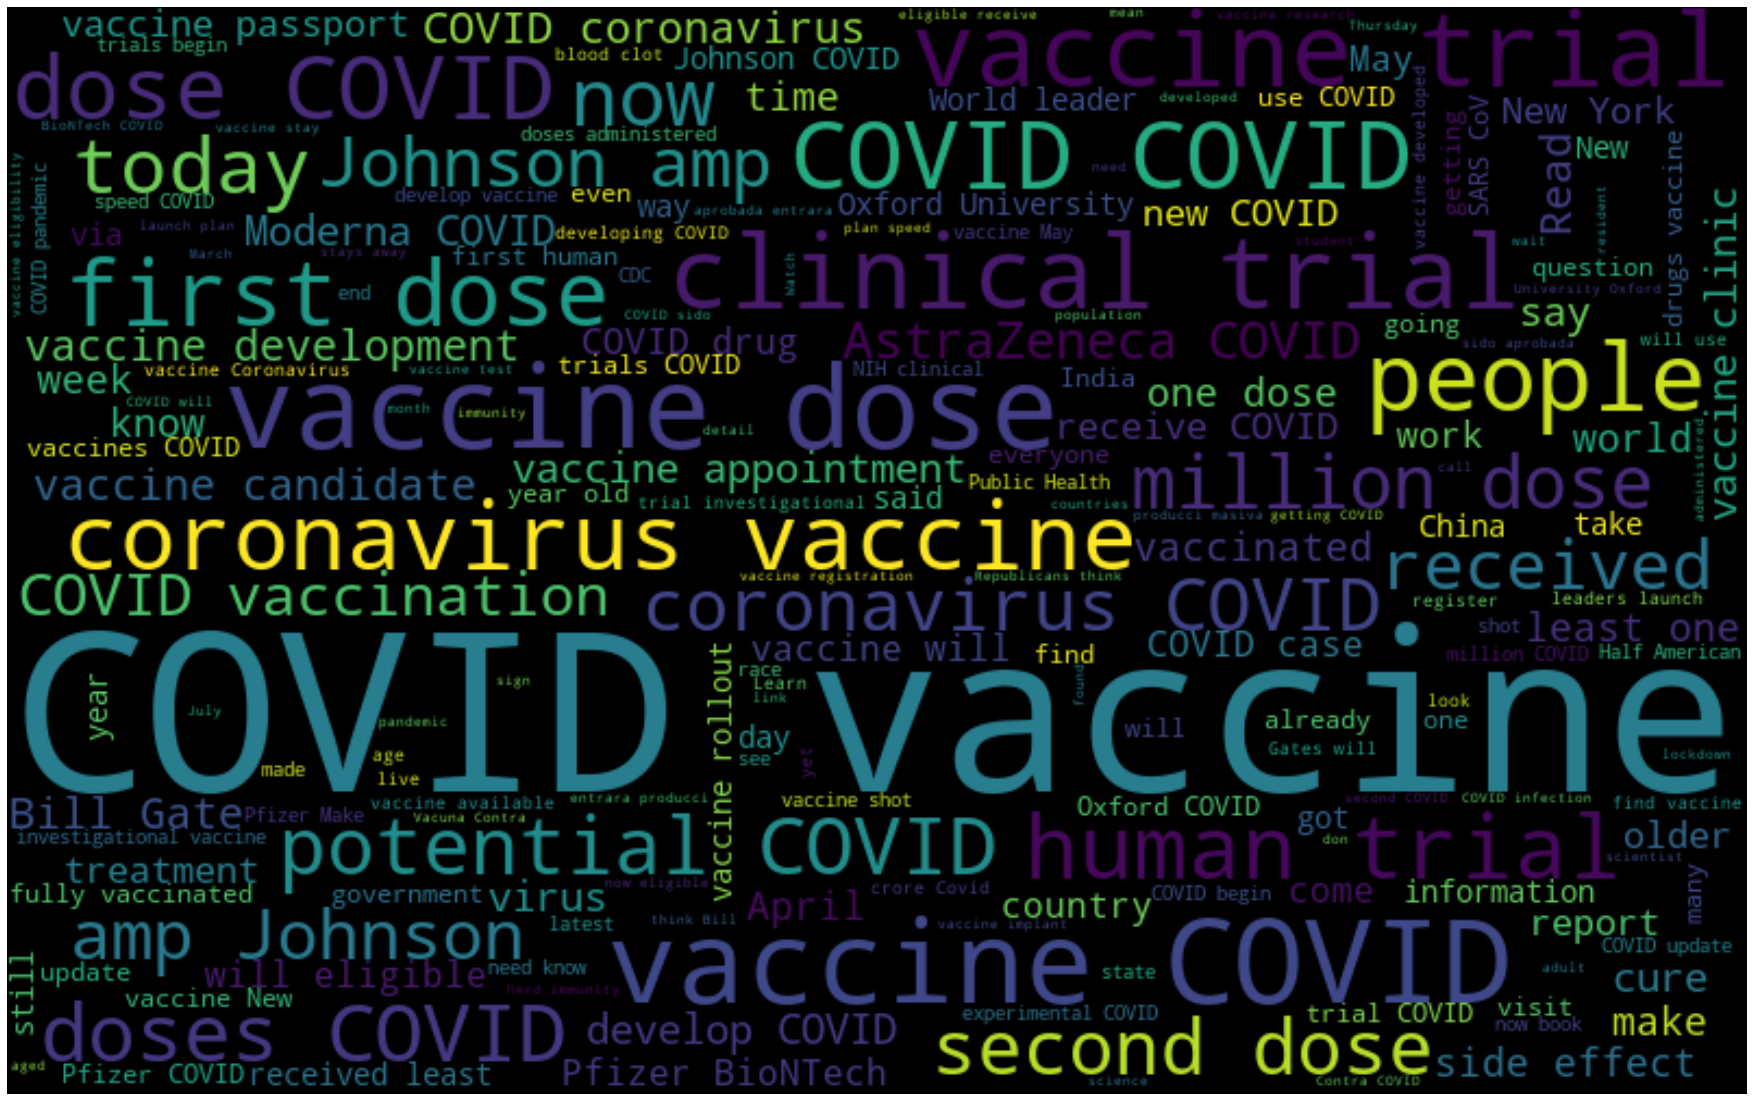

In [50]:
# create text from just normal tweets
normal_words = ' '.join([text for text in df_concat_all['newcontent'][df_concat_all['nltk_sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(40, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [51]:
df_final_copy=df_concat_all

In [52]:
from sklearn.model_selection import train_test_split


X, y = df_final_copy.newcontent, df_final_copy.nltk_sentiment

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

pipe = Pipeline([('vect', CountVectorizer(stop_words='english')),
                 ('model', MultinomialNB()),])

mod = pipe.fit(X_train, y_train)

predicted = mod.predict(X_test)

print(classification_report(y_test,
                            predicted))

from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, predicted))

              precision    recall  f1-score   support

    Negative       0.73      0.75      0.74     17325
     Neutral       0.87      0.76      0.81     26287
    Positive       0.77      0.85      0.81     31388

    accuracy                           0.79     75000
   macro avg       0.79      0.79      0.79     75000
weighted avg       0.80      0.79      0.79     75000

Accuracy: 0.7935466666666666
